# 1 Implement the Informed Search algorithm for real-life problems.

| Question                            | Answer                                                          |
| ----------------------------------- | --------------------------------------------------------------- |
| What is A* Search?                  | Best-first search using real cost + estimate.                   |
| Formula for A*?                     | `f(n) = g(n) + h(n)`                                            |
| What is `g(n)`?                     | Actual cost from start to `n`.                                  |
| What is `h(n)`?                     | Heuristic estimate from `n` to goal.                            |
| Why use a priority queue?           | To always expand the node with lowest total estimated cost.     |
| Is A* optimal?                      | Yes, if heuristic is admissible (never overestimates).          |
| Difference between A* and Dijkstra? | A* uses heuristic; Dijkstra doesn't.                            |
| Space complexity?                   | Worst case exponential, but better than BFS/DFS for large maps. |


The A* (A-Star) search algorithm is an informed search method used to find the shortest path between two nodes in a graph. It is widely applied in navigation systems, robotics, and game development due to its efficiency and accuracy. A* works by combining two values: the actual cost from the start node to the current node, known as g(n), and a heuristic value h(n), which estimates the cost from the current node to the goal. Their sum f(n) = g(n) + h(n) determines the priority of each node in the search queue. The algorithm begins at the starting point and uses a priority queue (min-heap) to always expand the node with the lowest f(n) value. As it explores, it updates the minimum cost to reach each node and tracks parent nodes to reconstruct the final path. The process continues until the goal node is reached, ensuring the path found is optimal as long as the heuristic used does not overestimate the remaining distance. In this program, cities are treated as graph nodes, road distances represent costs, and a heuristic table gives estimated distances to the destination. The algorithm computes the most cost-efficient route from Delhi to Nashik by evaluating both actual and estimated costs, ultimately producing the shortest path along with its total distance.




-------------------------------------------------------------------------------------------------------




| Variable         | Meaning                                                    |
| ---------------- | ---------------------------------------------------------- |
| `graph`          | Map of cities and distances between them                   |
| `heuristic`      | Estimated distance from each city to the goal (used by A*) |
| `start`          | Starting city (source node)                                |
| `goal`           | Destination city (target node)                             |
| `priority_queue` | Min-heap storing nodes by priority (cost + heuristic)      |
| `g_cost`         | Dictionary storing actual cost from start to each node     |
| `parent`         | Stores the previous node to reconstruct path               |
| `current_node`   | Node being explored right now                              |
| `current_cost`   | Priority cost popped from heap                             |
| `new_cost`       | Actual updated path cost to neighbor                       |
| `priority`       | `g_cost + heuristic` → A* formula                          |



In [100]:
import heapq
def a_star(graph,heuristic,start,goal):
    priority_queue=[(0,start)]
    g_cost={start:0}
    parent={start:None}
    while priority_queue:
        current_cost,current_node=heapq.heappop(priority_queue)
        if current_node==goal:
            path=[]
            while current_node is not None:
                path.append(current_node)
                current_node=parent[current_node]
            return path[::-1],g_cost[goal]
        for neighbour,cost in graph[current_node]:
            new_cost=g_cost[current_node]+cost
            if neighbour not in g_cost or new_cost<g_cost[neighbour]:
                g_cost[neighbour]=new_cost
                priority=new_cost+heuristic[neighbour]
                heapq.heappush(priority_queue,(priority,neighbour))
                parent[neighbour]=current_node
    return None
graph = {
    "Delhi": [("Agra", 233), ("Jaipur", 273)],
    "Agra": [("Gwalior", 120), ("Kanpur", 290)],
    "Jaipur": [("Kota", 252), ("Delhi", 273)],
    "Gwalior": [("Indore", 484)],
    "Kanpur": [("Lucknow", 90)],
    "Kota": [("Indore", 340)],
    "Lucknow": [],
    "Indore": [("Nashik",420)],
    "Nashik":[]
}
heuristic = {
    "Delhi": 240,
    "Agra": 240,
    "Gwalior": 350,
    "Kanpur": 500,
    "Jaipur": 0,
    "Kota": 250,
    "Indore": 400,
    "Lucknow": 600,
    "Nashik": 420
}
starting="Delhi"
goal="Nashik"
print("-------------------------------")
path,dist=a_star(graph,heuristic,starting,goal)
print("PATH ",path)
print("Total distance ",dist)

-------------------------------
PATH  ['Delhi', 'Agra', 'Gwalior', 'Indore', 'Nashik']
Total distance  1257


# 2. Design an algorithm using Breadth-First Search (BFS) to find the shortest path from a start node to a goal node in a maze represented as a grid graph. The maze contains obstacles (walls) and free cells. Implement BFS to ensure that the first found path is the optimal one in terms of the number of steps.

| Variable    | Meaning                                              |
| ----------- | ---------------------------------------------------- |
| `maze`      | 2D grid where `0` = free path, `1` = wall/block      |
| `start`     | Starting cell coordinates `(row, col)`               |
| `goal`      | Target cell coordinates `(row, col)`                 |
| `deque`     | Queue used for BFS traversal                         |
| `queue`     | Stores cells to explore in FIFO order                |
| `visited`   | Set of already-visited cells to avoid revisiting     |
| `parent`    | Stores predecessor of each cell to reconstruct path  |
| `direction` | Possible movement directions (right, left, down, up) |
| `(x, y)`    | Current cell coordinates                             |
| `(nx, ny)`  | Neighboring cell coordinates to explore next         |


Breadth-First Search (BFS) is a graph traversal algorithm used to find the shortest path in unweighted graphs or grid mazes. It explores nodes level by level, ensuring that the first time it reaches the goal, the path found is the shortest one. In this program, the maze is represented as a 2-dimensional grid where 0 indicates a free path and 1 represents a wall. Starting from the initial position, BFS uses a queue to explore neighboring cells in all four directions—left, right, up, and down—while a visited set prevents revisiting the same cell. The parent dictionary keeps track of the path taken by storing each cell’s predecessor, allowing the final path to be reconstructed once the goal is reached. When the goal cell is found, the algorithm traces back using the parent links and prints the shortest path and total steps. This approach guarantees an optimal solution because BFS always expands the nearest nodes first.



| Question                          | Answer                                                                                             |
| --------------------------------- | -------------------------------------------------------------------------------------------------- |
| What is BFS?                      | BFS is a level-order traversal algorithm used to find shortest paths in unweighted graphs.         |
| Why BFS gives shortest path?      | It explores layer by layer, so the first time it reaches the goal is the shortest route.           |
| Why use a queue in BFS?           | To follow FIFO order so nodes are visited in increments of distance.                               |
| What does `visited` do?           | Prevents revisiting and loops in the search.                                                       |
| Why maintain `parent` dictionary? | To reconstruct the final shortest path once the goal is found.                                     |
| What is the time complexity?      | O(V + E), where V = nodes, E = edges.                                                              |
| Where is BFS used in real life?   | GPS navigation, AI maze solving, networking (broadcast routing), social network friend suggestion. |
| Difference between BFS and DFS?   | BFS finds shortest path and uses queue; DFS goes deep first and uses stack/recursion.              |



In [101]:
from collections import deque
def bfs(maze,start,goal):
    rows,cols=len(maze),len(maze[0])
    queue=deque([start])
    visited=set([start])
    parent={start:None}
    direction=[(0,1),(0,-1),(1,0),(-1,0)]
    while queue:
        x,y=queue.popleft()
        if (x,y) ==goal:
            path=[]
            cur=goal
            while cur is not None:
                path.append(cur)
                cur=parent[cur]
            return path[::-1]
        for dx,dy in direction:
            nx,ny=x+dx,y+dy
            if 0<=nx<rows and 0<=ny<cols and maze[nx][ny]==0 and (nx,ny) not in visited:
                visited.add((nx,ny))
                parent[(nx,ny)]=(x,y)
                queue.append((nx,ny))
    return None
maze=[
    [0,1,1,1,0],
    [0,0,1,1,0],
    [1,0,1,0,0],
    [1,0,1,0,1],
    [1,0,0,0,1],
]
start=(0,0)
goal=(0,4)
path=bfs(maze,start,goal)
if path:
    print("Shortest Distance "," -> ".join(str(p) for p in path))
    print("Steps ",len(path)-1)
else:
    print("Path not found ")

Shortest Distance  (0, 0) -> (1, 0) -> (1, 1) -> (2, 1) -> (3, 1) -> (4, 1) -> (4, 2) -> (4, 3) -> (3, 3) -> (2, 3) -> (2, 4) -> (1, 4) -> (0, 4)
Steps  12


In [102]:
def depth_first_search(graph,start,goal):
    visited=set()
    order=[]
    path=[]
    def dfs(node):
        if node in visited:
            return False
        visited.add(node)
        path.append(node)
        order.append(node)
        if node==goal:
            return True
        for neighbour in graph[node]:
            if dfs(neighbour):
                return True
        path.pop()
        return False
    dfs(start)
    return order,path
graph={
    "Camp": ["Forest", "River"],
    "Forest": ["Cave", "Clearing"],
    "Clearing": ["Tower"],
    "River": ["Waterfall"],
    "Cave": ["Treasure Room"],
    "Tower": ["Treasure Room"],
    "Waterfall": [],
    "Treasure Room": []
}
starting="Camp"
goal="Treasure Room"
order,path=depth_first_search(graph,starting,goal)
if path:
    for step,node in enumerate(order,start=1):
        print(f"{step}.{node}")
    if goal and path[-1]==goal:
        print("Path "," -> ".join(path))
else:
    print("No Path Found")

1.Camp
2.Forest
3.Cave
4.Treasure Room
Path  Camp -> Forest -> Cave -> Treasure Room


# 4 Develop a pathfinding solution using the A* algorithm for a maze-based game environment. The agent must find the most cost-efficient route from the start position to the goal, considering movement costs and a suitable heuristic function (e.g., Manhattan distance) to guide the search efficiently.
| Variable          | Meaning                                                             |
| ----------------- | ------------------------------------------------------------------- |
| `maze`            | Grid of 0s (free path) & 1s (walls)                                 |
| `start`           | Starting cell coordinates                                           |
| `goal`            | Target cell coordinates                                             |
| `heuristic(a, b)` | Manhattan distance between two cells (estimate of distance to goal) |
| `open_set`        | Priority queue that stores nodes to explore next                    |
| `parent`          | Stores where each cell came from (to trace final path)              |
| `g_cost`          | Dictionary storing actual cost from start to each cell              |
| `dirs`            | Allowed movement directions: right, left, down, up                  |
| `(x, y)`          | Current cell                                                        |
| `(nx, ny)`        | Next neighbor cell                                                  |
| `new_cost`        | Updated actual cost (g) to move to next cell                        |
| `f_cost`          | `g + h` total estimated cost (A* formula)                           |

The A* search algorithm is an informed search technique used to find the shortest path in a grid or graph, combining actual path cost and heuristic estimation for efficiency. In this maze program, open cells are represented by 0 and walls by 1. A* begins at the start position and uses a priority queue to always explore the most promising cell next, based on the formula f(n) = g(n) + h(n), where g(n) is the actual distance from the start and h(n) is the heuristic estimate to the goal. The Manhattan distance heuristic is used since movement is only allowed in four directions. While traversing the grid, the algorithm updates the minimum cost to reach each cell and records parent links to reconstruct the final path. When the goal cell is reached, the path is traced back using the parent dictionary. This ensures the solution is optimal and efficient, making A* ideal for real-time path-finding in robotics, navigation systems, and games.

| Question                            | Answer                                                                         |         |   |         |   |
| ----------------------------------- | ------------------------------------------------------------------------------ | ------- | - | ------- | - |
| What is A* algorithm?               | A path-finding algorithm that finds the shortest route using cost + heuristic. |         |   |         |   |
| Why do we use heuristic?            | To guide search towards the goal faster instead of exploring blindly.          |         |   |         |   |
| What heuristic is used here?        | Manhattan distance: `                                                          | x1 - x2 | + | y1 - y2 | ` |
| Why A* is better than BFS?          | BFS checks all paths; A* intelligently prioritizes promising paths.            |         |   |         |   |
| Explain `f(n) = g(n) + h(n)`        | Total cost = actual cost so far + estimated cost to goal.                      |         |   |         |   |
| Why priority queue?                 | To always expand the node with lowest estimated total cost.                    |         |   |         |   |
| Where is A* used in real life?      | Google Maps, robot navigation, game AI, autonomous cars.                       |         |   |         |   |
| Difference between A* and Dijkstra? | Dijkstra uses only `g(n)`, A* uses `g(n) + h(n)` so it's faster.               |         |   |         |   |


In [103]:
import heapq
def a_star(maze,start,goal):
    rows,cols=len(maze),len(maze[0])
    def heuristic(a,b):
        return abs(a[0]-b[0])+abs(a[1]-b[1])
    open_set=[]
    heapq.heappush(open_set,(0+heuristic(start,goal),0,start))
    parent={start:None}
    g_cost={start:0}
    dirs=[(0,1),(0,-1),(1,0),(-1,0)]
    while open_set:
        _,cost,(x,y)=heapq.heappop(open_set)
        if (x,y) ==goal:
            path=[]
            cur=goal
            while cur is not None:
                path.append(cur)
                cur=parent[cur]
            return path[::-1]
        for dx,dy in dirs:
            nx,ny=x+dx,y+dy
            if 0<=nx<rows and 0<=ny<cols and maze[nx][ny]==0:
                new_cost=cost+1
                if (nx,ny) not in g_cost or new_cost<g_cost[(nx,ny)]:
                    g_cost[(nx,ny)]=new_cost
                    parent[(nx,ny)]=(x,y)
                    f_cost=new_cost+heuristic((nx,ny),goal)
                    heapq.heappush(open_set,(f_cost,new_cost,(nx,ny)))
    return None
maze = [
    [0,1,1,1,1],
    [0,0,0,0,1],
    [1,1,1,0,1],
    [0,1,0,0,0],
    [1,0,0,0,1]
]
start = (0, 0)
goal = (4, 1)
path=a_star(maze,start,goal)
if path:
    print("Shortest Path ","->".join(str(p) for p in path))
    if goal and path[-1]==goal:
        
        print("Steps ",len(path)-1)
else:
    print("Not found")

Shortest Path  (0, 0)->(1, 0)->(1, 1)->(1, 2)->(1, 3)->(2, 3)->(3, 3)->(3, 2)->(4, 2)->(4, 1)
Steps  9


# 5 Implementation of 8 puzzles game.
| Variable            | Meaning                                                 |
| ------------------- | ------------------------------------------------------- |
| `goal`              | Final solved puzzle state `(0,1,2,3,4,5,6,7,8)`         |
| `state`             | Current puzzle configuration (3×3 board as tuple)       |
| `manhattern(state)` | Heuristic function (Manhattan distance for tiles)       |
| `moves(state)`      | Generates all valid next moves by sliding the blank `0` |
| `i`                 | Index of blank tile `0`                                 |
| `r, c`              | Row & column of the blank tile                          |
| `dr, dc`            | Possible movement directions (up, down, left, right)    |
| `new`               | New puzzle state after moving blank                     |
| `a_star(start)`     | A* implementation for 8-puzzle                          |
| `pq`                | Priority queue storing `(f, g, state, path)`            |
| `f`                 | Total cost `f = g + heuristic`                          |
| `g`                 | Cost so far (number of moves taken)                     |
| `visited`           | Set to avoid repeated states                            |
| `path`              | Stores the sequence of states from start to goal        |
| `start`             | Initial puzzle configuration                            |
| `nxt`               | Next valid state after move                             |

The 8-Puzzle problem is a classic AI search problem where tiles numbered from 1 to 8 must be arranged in a specific order by sliding them into the blank position. This program uses the A* search algorithm to find the shortest sequence of moves from the start configuration to the goal state. A* evaluates each state using f(n) = g(n) + h(n) where g(n) is the actual number of moves taken so far, and h(n) is the Manhattan distance heuristic, calculated as the sum of the distances each tile must move to reach its correct position. A priority queue is used to always expand the most promising state first, and repeated states are avoided using a visited set. The program continues generating and exploring valid moves until the goal configuration is reached, and then reconstructs the optimal solution path. This approach guarantees an optimal solution because the heuristic used is admissible and consistent, making A* a highly efficient method for solving the 8-puzzle.

| Question                            | Answer                                                                                       |
| ----------------------------------- | -------------------------------------------------------------------------------------------- |
| What is the 8-Puzzle problem?       | A sliding tile puzzle where the goal is to arrange tiles in order by moving the blank space. |
| Which algorithm is used here?       | A* search.                                                                                   |
| Why A* for 8-Puzzle?                | It guarantees optimal solution while searching efficiently.                                  |
| What is `g(n)`?                     | Actual cost — number of moves made so far.                                                   |
| What is `h(n)`?                     | Heuristic estimate — Manhattan distance of all tiles.                                        |
| Formula used by A*?                 | `f(n) = g(n) + h(n)`                                                                         |
| Why Manhattan distance?             | It gives minimum tile movement estimate and is admissible.                                   |
| What data structure is used for A*? | Priority queue (min-heap).                                                                   |
| What is the branching factor?       | About 2–4 depending on blank tile position.                                                  |
| Why maintain `visited`?             | To avoid exploring already-seen states and reduce time.                                      |
| Is the 8-Puzzle always solvable?    | No — only configurations with even inversions are solvable.                                  |


In [104]:
import heapq
goal=(0,1,2,3,4,5,6,7,8)
def manhattern(state):
    dist=0
    for i,val in enumerate(state):
        if val!=0:
            gr,gc=divmod(val-1,3)
            r,c=divmod(i,3)
            dist+=abs(gr-r)+abs(gc-c)
    return dist
def moves(state):
    i=state.index(0)
    r,c=divmod(i,3)
    dirs=[(-1,0),(1,0),(0,-1),(0,1)]
    for dr,dc in dirs:
        nr,nc=r+dr,c+dc
        if 0<=nr<3 and 0<=nc<3:
            new=list(state)
            new[i],new[3*nr+nc]=new[3*nr+nc],new[i]
            yield tuple(new)
def a_star(start):
    pq=[(manhattern(start),0,start,[])]
    visited=set()
    while pq:
        f,g,state,path=heapq.heappop(pq)
        if state in visited:
            continue
        visited.add(state)
        if state==goal:
            return path+[state]
        for nxt in moves(state):
            if nxt not in visited:
                heapq.heappush(pq,(g+1+manhattern(nxt),g+1,nxt,path+[state]))
    return None
start=(1,2,3,4,5,6,7,8,0)
path=a_star(start)
if path:
    for s in path:
        print(s[0:3])
        print(s[3:6])
        print(s[6:9], "\n")
        print("--------")
    print("Steps ",len(path)-1)
else:
    print("Path Not Found")

(1, 2, 3)
(4, 5, 6)
(7, 8, 0) 

--------
(1, 2, 3)
(4, 5, 0)
(7, 8, 6) 

--------
(1, 2, 3)
(4, 0, 5)
(7, 8, 6) 

--------
(1, 2, 3)
(0, 4, 5)
(7, 8, 6) 

--------
(1, 2, 3)
(7, 4, 5)
(0, 8, 6) 

--------
(1, 2, 3)
(7, 4, 5)
(8, 0, 6) 

--------
(1, 2, 3)
(7, 4, 5)
(8, 6, 0) 

--------
(1, 2, 3)
(7, 4, 0)
(8, 6, 5) 

--------
(1, 2, 0)
(7, 4, 3)
(8, 6, 5) 

--------
(1, 0, 2)
(7, 4, 3)
(8, 6, 5) 

--------
(1, 4, 2)
(7, 0, 3)
(8, 6, 5) 

--------
(1, 4, 2)
(7, 6, 3)
(8, 0, 5) 

--------
(1, 4, 2)
(7, 6, 3)
(0, 8, 5) 

--------
(1, 4, 2)
(0, 6, 3)
(7, 8, 5) 

--------
(1, 4, 2)
(6, 0, 3)
(7, 8, 5) 

--------
(1, 4, 2)
(6, 3, 0)
(7, 8, 5) 

--------
(1, 4, 2)
(6, 3, 5)
(7, 8, 0) 

--------
(1, 4, 2)
(6, 3, 5)
(7, 0, 8) 

--------
(1, 4, 2)
(6, 3, 5)
(0, 7, 8) 

--------
(1, 4, 2)
(0, 3, 5)
(6, 7, 8) 

--------
(1, 4, 2)
(3, 0, 5)
(6, 7, 8) 

--------
(1, 0, 2)
(3, 4, 5)
(6, 7, 8) 

--------
(0, 1, 2)
(3, 4, 5)
(6, 7, 8) 

--------
Steps  22


# 9 /10 Uber Ride Price Prediction using PCA and EDA: Dataset can be change(iris dataset) ● Perform Exploratory Data Analysis (EDA) on Uber ride data ● Use Principal Component Analysis (PCA) to reduce dimensionality ● Compare the performance of models with and without PCA

This project predicts Uber fare prices using Machine Learning. After cleaning the dataset and removing invalid values, distance between pickup and drop-off locations is computed using the Haversine formula. Features are standardized to ensure equal scaling, and a Linear Regression model is trained both with and without PCA to compare performance. PCA (Principal Component Analysis) is applied manually to reduce features while preserving most of the data variance, improving computational efficiency. The model performance is evaluated using R², RMSE, and MAE, and finally the system predicts real-time fare based on user input coordinates and passenger count.

| **Question**                            | **Answer**                                                                                             |
| --------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| What is the objective of this project?  | To predict Uber fare based on trip distance, passenger count, and location features.                   |
| Which ML algorithm is used?             | Linear Regression (with & without PCA comparison).                                                     |
| Why did we remove negative fare values? | Negative fares are invalid and represent incorrect data, so they must be removed.                      |
| What is the purpose of `dropna()`?      | To remove rows with missing coordinate values, ensuring data completeness.                             |
| Why did we calculate distance?          | Distance is the most important feature for fare estimation, calculated using the Haversine formula.    |
| What is the Haversine formula?          | A mathematical formula to compute distance between two geo-coordinates over Earth’s surface.           |
| Why do we scale features?               | To standardize data so all features contribute equally to the model and improve stability.             |
| What is PCA?                            | Principal Component Analysis — dimensionality reduction technique to remove noise & compress features. |
| Why did we apply PCA?                   | To reduce dimensionality, speed up training, and check if performance improves.                        |
| How did we choose number of components? | We selected components that explain **95% variance** (cumulative explained variance ≥ 0.95).           |
| Metrics used?                           | R² Score, RMSE, MAE.                                                                                   |
| Interpret R² Score                      | Measures model accuracy — closer to 1 means better fit.                                                |
| Interpret RMSE & MAE                    | Error metrics — lower values mean better predictions.                                                  |
| Why train with & without PCA?           | To compare model performance and demonstrate PCA impact.                                               |
| Why train-test split?                   | To evaluate model performance on unseen data and prevent overfitting.                                  |
| Why `StandardScaler`?                   | To normalize features so they have mean 0 & standard deviation 1.                                      |
| What does `corr()` do?                  | Shows correlation between features to detect multicollinearity.                                        |
| Why heatmap?                            | To visualize correlation relationships among numeric features.                                         |
| What does `.fit()` do?                  | Trains the machine learning model.                                                                     |
| What does `.predict()` do?              | Generates fare predictions using trained model.                                                        |
| User input section purpose?             | To allow real-time fare prediction based on actual trip coordinates & passengers.                      |



In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
np.random.seed(42)

In [114]:
df=pd.read_csv('uber.csv')
df.shape
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,2012-12-11 13:52:00.00000029,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,2012-02-17 09:32:00.00000043,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967154        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000 

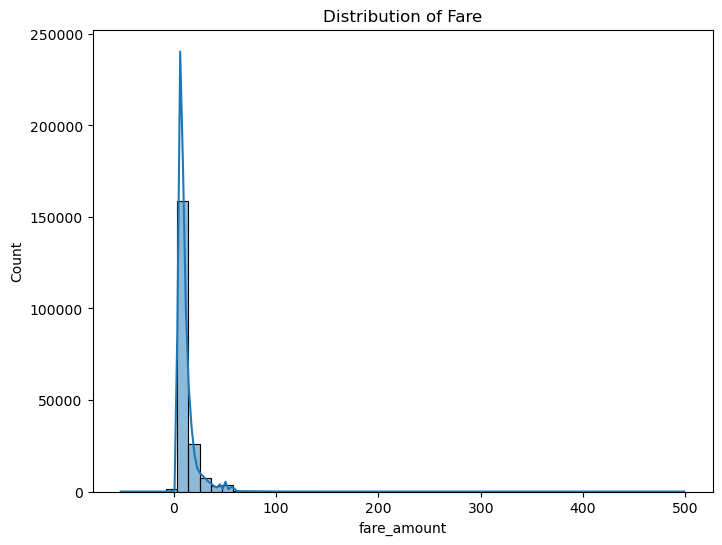

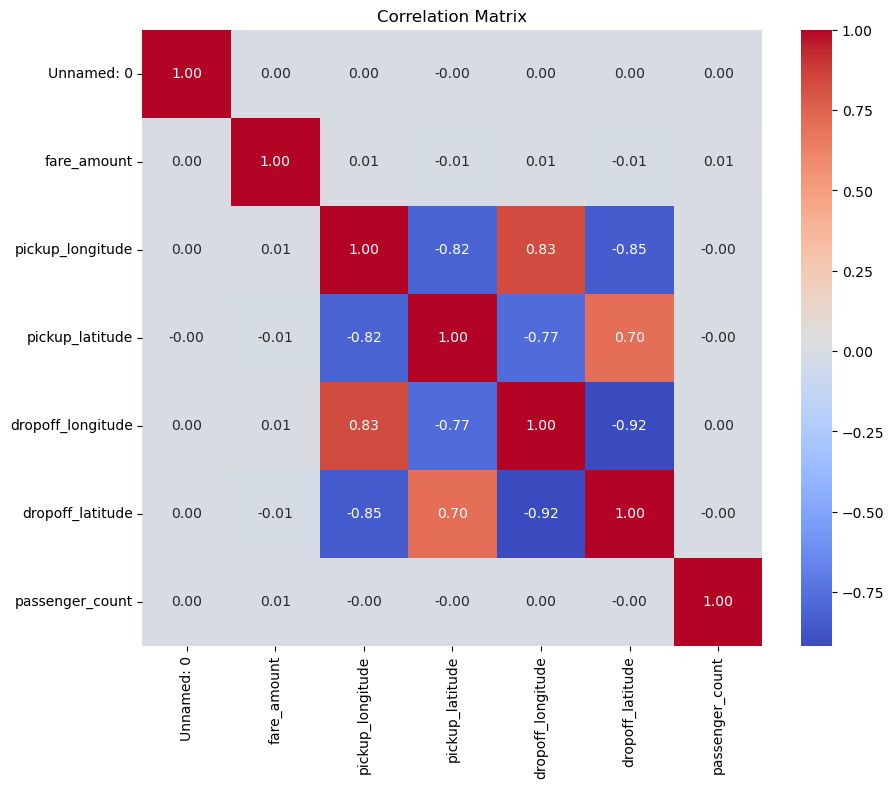

In [115]:
print(df.isnull().sum())
print(df.describe())
plt.figure(figsize=(8,6))
sns.histplot(df['fare_amount'],bins=50,kde=True)
plt.title('Distribution of Fare')
plt.show()
numeric=df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [116]:
df=df[df['fare_amount']>0]
df.dropna(subset=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],inplace=True)
def haversine(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2=map(np.radians,[lon1,lat1,lon2,lat2])
    dlat=lat2-lat1
    dlon=lon2-lon1
    a=np.sin(dlat/2)**2+np.cos(lat2)*np.cos(lat1)*np.sin(dlon/2)**2
    c=2*np.arcsin(np.sqrt(a))
    km=6371*c
    return km 
df['distance_km']=haversine(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])
feature=['passenger_count','distance_km','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
X=df[feature]
y=df['fare_amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
print("Without PCA")
print("R2 Score ",r2_score(y_test,y_pred))
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE ",mean_absolute_error(y_test,y_pred))

Without PCA
R2 Score  0.0006149642714874393
RMSE  9.640050597693737
MAE  6.029260762583535


In [117]:
cov_mat=np.cov(X_train_scaled,rowvar=False)
eig_val,eig_vec=np.linalg.eigh(cov_mat)
sorted_idx=np.argsort(eig_val)[::-1]
eig_val=eig_val[sorted_idx]
eig_vec=eig_vec[:,sorted_idx]
ev=eig_val/np.sum(eig_val)
cu=np.cumsum(ev)
n_components=np.argmax(cu>=0.95)+1
W=eig_vec[:, :n_components]
X_train_pca=X_train_scaled.dot(W)
X_test_pca=X_test_scaled.dot(W)
lr_pca=LinearRegression()
lr_pca.fit(X_train_pca,y_train)
y_pred_pca=lr_pca.predict(X_test_pca)
print("With PCA")
print("R2 Score ",r2_score(y_test,y_pred_pca))
print("RMSE ",np.sqrt(mean_squared_error(y_test,y_pred_pca)))
print("MAE ",mean_absolute_error(y_test,y_pred_pca))

With PCA
R2 Score  0.0006257781131104867
RMSE  9.639998442488949
MAE  6.029104949128945


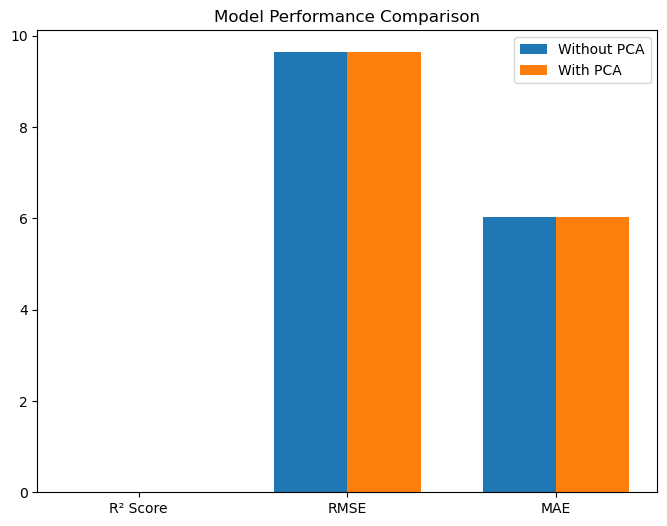

In [118]:
metrics = ['R² Score', 'RMSE', 'MAE']
no_pca_scores = [r2_score(y_test,y_pred), np.sqrt(mean_squared_error(y_test,y_pred)), mean_absolute_error(y_test,y_pred)]
pca_scores = [r2_score(y_test,y_pred_pca), np.sqrt(mean_squared_error(y_test,y_pred_pca)), mean_absolute_error(y_test,y_pred_pca)]
x = np.arange(len(metrics))
width = 0.35
plt.figure(figsize=(8,6))
plt.bar(x - width/2, no_pca_scores, width, label='Without PCA')
plt.bar(x + width/2, pca_scores, width, label='With PCA')
plt.xticks(x, metrics)
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

In [119]:
print("\n--- Uber Fare Prediction ---")
passenger_count = int(input("Enter number of passengers: "))
pickup_long = float(input("Enter pickup longitude: "))
pickup_lat = float(input("Enter pickup latitude: "))
dropoff_long = float(input("Enter dropoff longitude: "))
dropoff_lat = float(input("Enter dropoff latitude: "))
distance = haversine(pickup_long, pickup_lat, dropoff_long, dropoff_lat)
user_input = np.array([[passenger_count, distance, pickup_long, pickup_lat, dropoff_long, dropoff_lat]])
user_input_scaled = scaler.transform(user_input)
user_input_pca = user_input_scaled.dot(W)
fare_no_pca = lr.predict(user_input_scaled)[0]
fare_pca = lr_pca.predict(user_input_pca)[0]
print(f"\nPredicted Fare (Without PCA): ₹{fare_no_pca:.2f}")
print(f"Predicted Fare (With PCA): ₹{fare_pca:.2f}")


--- Uber Fare Prediction ---


Enter number of passengers:  1
Enter pickup longitude:  -73.994355
Enter pickup latitude:  40.728225	
Enter dropoff longitude:  -73.994710
Enter dropoff latitude:  40.750325



Predicted Fare (Without PCA): ₹11.28
Predicted Fare (With PCA): ₹11.28


E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 11 Implement a Linear Regression model to predict house prices from area, bedrooms, and location features. Apply K-Fold Cross-Validation to validate the model.

This project predicts house prices using a manual implementation of Linear Regression. Missing values are handled using mean and mode, and categorical Location is encoded with one-hot encoding. Features like Area and Bedrooms are standardized for consistency. Instead of using sklearn’s model, the regression coefficients are computed directly using the Normal Equation formula. The model performance is evaluated using RMSE and R², and further validated with 5-fold cross-validation to ensure stability of results. Finally, the system accepts user inputs and predicts the house price based on the trained model.



| Question                                            | Answer                                                                              |
| --------------------------------------------------- | ----------------------------------------------------------------------------------- |
| What is the goal of this project?                   | Predict house prices based on key features.                                         |
| Which ML algorithm is used?                         | Linear Regression (manually using Normal Equation).                                 |
| Why fill missing values?                            | To avoid errors and maintain data quality for training.                             |
| Why fill numeric with mean & categorical with mode? | Mean preserves numeric distribution; mode preserves most common category.           |
| Why use One-Hot Encoding?                           | To convert categorical `Location` into numeric form.                                |
| Why use StandardScaler?                             | To normalize features so model converges properly.                                  |
| What is the Normal Equation?                        | A closed-form formula to compute regression coefficients without gradient descent.  |
| Normal Equation formula?                            | β = (XᵀX)⁻¹ Xᵀy (pseudo-inverse used here).                                         |
| Why use pseudo-inverse?                             | More stable when matrix (XᵀX) is non-invertible or ill-conditioned.                 |
| Why add bias term (ones column)?                    | To learn intercept of linear model.                                                 |
| What metrics are used?                              | RMSE & R².                                                                          |
| Interpret RMSE                                      | Measures average prediction error — lower is better.                                |
| Interpret R²                                        | Measures model accuracy — closer to 1 is better.                                    |
| What is K-Fold cross-validation?                    | Splits data into K parts to evaluate model multiple times for reliable performance. |
| Why shuffle in KFold?                               | To avoid biased splits and randomize data.                                          |
| Why manual regression instead of sklearn?           | To understand inner workings of Linear Regression mathematically.                   |
| What is the output of this project?                 | Predicted house price for given features.                                           |



In [178]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [121]:
df=pd.read_csv('Synthetic_House_Price_Dataset.csv')
df.shape
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      1000 non-null   int64 
 1   Bedrooms  1000 non-null   int64 
 2   Location  1000 non-null   object
 3   Price     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


,Area,Bedrooms,Location,Price
0,1360,2,Urban,10998707
1,4272,3,Urban,34199426
2,3592,1,Urban,28695658
3,966,6,Urban,8444717
4,4926,1,Suburban,24865588
5,3944,2,Urban,31833217
6,3671,5,Suburban,19115147
7,3419,1,Urban,27414727
8,630,1,Urban,5550433
9,2185,6,Urban,18243637


In [122]:
df['Area']=df['Area'].fillna(df['Area'].mean())
df['Bedrooms']=df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Location']=df['Location'].fillna(df['Location'].mode()[0])
df=pd.get_dummies(df,drop_first=True)
df=df.apply(pd.to_numeric,errors='coerce')
scaler=StandardScaler()
df[['Area','Bedrooms']]=scaler.fit_transform(df[['Area','Bedrooms']])
df=df.astype(float)
X=df.drop('Price',axis=1).values
y=df['Price'].values
X_b=np.hstack([np.ones((X.shape[0],1)),X])
beta=np.linalg.pinv(X_b.T@X_b)@(X_b.T@y)
def predict(x):
    x=np.hstack([np.ones((x.shape[0],1)),x])
    return x@beta
y_pred=predict(X)
print("RSME ",np.sqrt(mean_squared_error(y,y_pred)))
print("R2 ",r2_score(y,y_pred))

RSME  2537543.88086052
R2  0.9354905593765316


In [125]:
kf=KFold(n_splits=5,shuffle=True,random_state=1)
rsme=[]
r2=[]
for train_idx,test_idx in kf.split(X):
    X_train,X_test=X[train_idx],X[test_idx]
    y_train,y_test=y[train_idx],y[test_idx]
    X_train_b=np.hstack([np.ones((X_train.shape[0],1)),X_train])
    X_test_b=np.hstack([np.ones((X_test.shape[0],1)),X_test])
    beta_fold=np.linalg.pinv(X_train_b.T@X_train_b)@(X_train_b.T@y_train)
    y_pred_fold=X_test_b@beta
    rsme.append(np.sqrt(mean_squared_error(y_test,y_pred_fold)))
    r2.append(r2_score(y_test,y_pred_fold))
print("\nAverage RMSE:", np.mean(rsme))
print("Average R2:", np.mean(r2))


Average RMSE: 2534207.190461469
Average R2: 0.9353495233601846


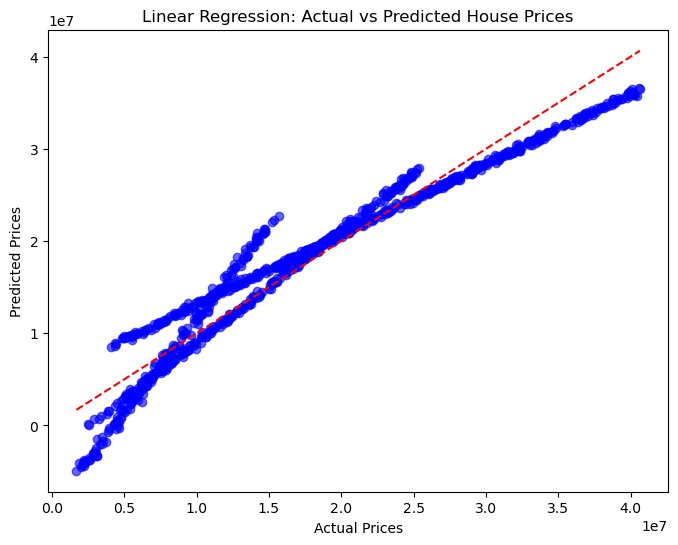

In [126]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.show()

In [137]:
a=float(input("Area"))
b=float(input("Bedroom"))
l=input(f"location {list (df.filter(like='Location_'))}:")
x={c:0 for c in df if c!='Price'}
x.update({'Area':a,'Bedrooms':b,l:1})
x=pd.DataFrame([x])
x[['Area','Bedrooms']]=scaler.transform(x[['Area','Bedrooms']])
print("Predicted Price ",round(predict(x.values)[0],2))

Area 4272
Bedroom 2
location ['Location_Suburban', 'Location_Urban']: Location_Urban


Predicted Price  23432334.14


# 16-17 Apply the Naïve Bayes algorithm to a real-world classification problem such as email spam detection, sentiment analysis, or disease diagnosis. Train and test the model, then evaluate its performance using a Confusion Matrix and related metrics such as accuracy, precision, recall, and F1-score. 


## Important Function & Core Logic Explanation

## train_nb(X, y) — Naive Bayes Training
This function separates the dataset into spam and ham emails, counts word frequencies, applies Laplace smoothing (+1), and calculates:
Conditional probability of each word given spam
Conditional probability of each word given ham
Prior probabilities (probability of spam & ham overall)
It prepares the probability model for Naive Bayes.

## predict_nb(X) — Prediction Function
Uses the learned probabilities to classify test emails:
For each email → calculate log probability of spam vs ham using all word counts, then assign the label with higher score.

## classify_nb(text) — Real Email Classifier
For a raw email text:
Lowercases & removes unwanted characters
Tokenizes into words
Creates bag-of-words vector
Computes spam score & ham score using Naive Bayes formula
Returns Spam / Not Spam
Used for manual testing with real messages.


This project implements a Naive Bayes classifier for detecting spam emails. The dataset contains word frequencies extracted from emails along with their spam/ham labels. Naive Bayes is trained by computing word occurrence probabilities for spam and ham emails along with their priors. Laplace smoothing is applied to handle zero counts. During prediction, log probabilities are used for stability, and emails are classified based on which class yields higher probability. The model performance is evaluated using confusion matrix, accuracy, precision, recall and F1 score. Finally, real-world example emails are passed to the classifier to demonstrate spam detection.

| Question                           | Answer                                                                      |
| ---------------------------------- | --------------------------------------------------------------------------- |
| What algorithm is used?            | Naive Bayes classifier.                                                     |
| Why use Naive Bayes for spam?      | Fast, works well with text, assumes word independence, requires small data. |
| What dataset format?               | Bag-of-words (word frequency features per email).                           |
| Purpose of `train_nb()`?           | Compute spam and ham word probabilities and priors.                         |
| Why +1 smoothing?                  | Laplace smoothing to avoid zero probabilities for unseen words.             |
| Formula for Naive Bayes?           | Posterior ∝ Likelihood × Prior.                                             |
| Why log probabilities?             | Prevent underflow and easier multiplication as sums.                        |
| What is `predict_nb()` doing?      | Computes log spam score & ham score for each email and classifies.          |
| Why `train_test_split`?            | To evaluate model on unseen data.                                           |
| Metrics used?                      | Accuracy, Precision, Recall, F1-score, Confusion Matrix.                    |
| Why evaluate model?                | To measure classification performance.                                      |
| Difference between spam and ham?   | Spam = unwanted/advertising email; Ham = legitimate email.                  |
| What is bag-of-words?              | Converts text to numeric features based on word counts.                     |
| Role of confusion matrix?          | Shows TP, FP, FN, TN performance.                                           |
| When is Naive Bayes preferred?     | Text classification, email filtering, sentiment detection.                  |
| Meaning of Precision?              | Out of predicted spam, how many were truly spam.                            |
| Meaning of Recall?                 | Out of actual spam, how many were detected correctly.                       |
| F1 score meaning?                  | Balance between precision and recall.                                       |
| Why clean text in `classify_nb()`? | To remove noise and match learned vocabulary.                               |
| Real-time classification purpose?  | To test model on real example emails.                                       |



In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [175]:
df=pd.read_csv('email.csv')
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


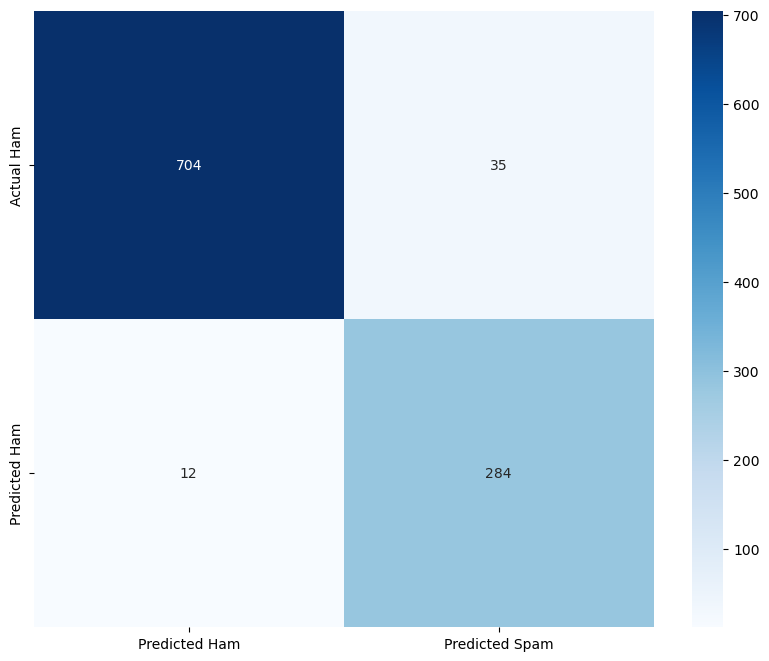

In [176]:
df=df.drop(columns=['Email No.'])
X=df.drop(columns=['Prediction']).astype(np.float32).values
y=df['Prediction'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
def train_nb(X,y):
    spam=X[y==1]
    ham=X[y==0]
    spam_wc=np.sum(spam,axis=0)+1
    ham_wc=np.sum(ham,axis=0)+1
    p_spam=spam_wc/np.sum(spam_wc)
    p_ham=ham_wc/np.sum(ham_wc)
    prior_spam=len(spam)/len(X)
    prior_ham=len(ham)/len(X)
    return p_spam,p_ham,prior_spam,prior_ham
p_spam,p_ham,prior_spam,prior_ham=train_nb(X_train,y_train)
def predict_nb(X):
    np_log_spam=np.log(p_spam)
    np_log_ham=np.log(p_ham)
    pred=[]
    for x in X:
        spam_score=np.sum(x*np_log_spam)+np.log(prior_spam)
        ham_score=np.sum(x*np_log_ham)+np.log(prior_ham)
        pred.append(1 if spam_score>ham_score else 0)
    return np.array(pred)
y_pred=predict_nb(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Predicted Ham','Predicted Spam'],yticklabels=['Actual Ham','Predicted Ham'])
plt.show()

In [177]:
def classify_nb(text):
    bow_words=df.drop(columns=['Prediction']).columns.tolist()
    text=text.lower()
    text=re.sub(r'[^a-s\s]','',text)
    words=text.split()
    vec=np.zeros(len(bow_words))
    for w in words:
        if w in bow_words:
            vec[bow_words.index(w)]+=1
    spam_score=np.sum(vec*np.log(p_spam))+np.log(prior_spam)
    ham_score=np.sum(vec*np.log(p_ham))+np.log(prior_ham)
    return 'Spam' if spam_score>ham_score else 'Not Spam'
test1 = "Congratulations! You have won a lottery. Claim your prize now!"
test2 = "Hi team, please find the attached project report. Thanks."

print("\nTest 1:", test1, "->", classify_nb(test1))
print("Test 2:", test2, "->", classify_nb(test2))


Test 1: Congratulations! You have won a lottery. Claim your prize now! -> Spam
Test 2: Hi team, please find the attached project report. Thanks. -> Not Spam
